### **Notebook for recognizing Bruteforce, DOS and Web Attacks.**

In [66]:

import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import tree


# TRAINING-DATASETS FOR TRAINING FOR DIFFERENT ATTACKS
'https://www.unb.ca/cic/datasets' (IDS 2017)

In [67]:
benign=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
bruteforce=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
dos=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
web=pd.read_csv('/content/drive/MyDrive/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')


In [68]:
import numpy as np

benign.replace([np.inf, -np.inf], np.nan, inplace=True)
bruteforce.replace([np.inf, -np.inf], np.nan, inplace=True)
dos.replace([np.inf, -np.inf], np.nan, inplace=True)
web.replace([np.inf, -np.inf], np.nan, inplace=True)





In [69]:
web.shape

(170366, 79)

In [70]:
benign_X=benign.values[:,0:78]
benign_Y=benign.values[:,78]
bruteforce_X=bruteforce.values[:,0:78]
bruteforce_Y=bruteforce.values[:,78]
dos_X=dos.values[:,0:78]
dos_Y=dos.values[:,78]
web_X=web.values[:,0:78]
web_Y=web.values[:,78]


Impute out the nans

In [71]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_1 = SimpleImputer(missing_values=np.nan, strategy='mean')
benign_X=imp_1.fit_transform(benign_X)

imp_2 = SimpleImputer(missing_values=np.nan, strategy='mean')
bruteforce_X=imp_2.fit_transform(bruteforce_X)

imp_3 = SimpleImputer(missing_values=np.nan, strategy='mean')
dos_X=imp_3.fit_transform(dos_X)

imp_4 = SimpleImputer(missing_values=np.nan, strategy='mean')
web_X=imp_4.fit_transform(web_X)




Encode Labels

In [72]:
le_benign=LabelEncoder()
le_benign.fit(benign_Y)
enc_benign_Y = le_benign.transform(benign_Y)

le_bruteforce=LabelEncoder()
le_bruteforce.fit(bruteforce_Y)
enc_bruteforce_Y = le_bruteforce.transform(bruteforce_Y)

le_dos=LabelEncoder()
le_dos.fit(dos_Y)
enc_dos_Y = le_dos.transform(dos_Y)

le_web=LabelEncoder()
le_web.fit(web_Y)
enc_web_Y = le_web.transform(web_Y)



TRAIN-TEST SPLIT


In [73]:
benign_X_train, benign_X_test, benign_Y_train, benign_Y_test = train_test_split(benign_X, enc_benign_Y, test_size=0.2)
bruteforce_X_train, bruteforce_X_test, bruteforce_Y_train, bruteforce_Y_test = train_test_split(bruteforce_X, enc_bruteforce_Y, test_size=0.2)
dos_X_train, dos_X_test, dos_Y_train, dos_Y_test = train_test_split(dos_X, enc_dos_Y, test_size=0.2)
web_X_train, web_X_test, web_Y_train, web_Y_test = train_test_split(web_X, enc_web_Y, test_size=0.2)


In [74]:
dos.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,6,6,6.000000,0.000000,3.132505e+02,52.208416,38308.000000,0.000000,38308,38308,0,0.000000,0.000000,0,0,0,0.000000,0.000000,0,0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1.039666e+06,33402.922760,31.933333,25.510409,73,0,479,47.900000,38.942836,109,1,401,100.250000,101.736178,237,3,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3195.595588,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5.753425e+06,14611.872150,73.000000,204.960972,810,1,1095,121.666667,298.746130,915,1,995,199.000000,345.535092,810,3,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,451250.132400,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058824,425.778474,3069,0,555.000000,977.480342,6.650007e+05,1907.141918,543.071429,2519.931377,13391,0,15206,950.375000,3322.417812,13391,2,15112,1373.818182,4176.449588,13961,3,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,496537.374700,0,0,0,1,0,0,0,0,0,348.689655,203.058824,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5.771062e+06,13736.263740,78.000000,207.000929,794,1,1092,136.500000,313.850738,910,1,1015,203.000000,333.240154,794,3,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,496440.116700,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# RANDOM-FOREST-IMPLEMENTATION FOR EACH

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [76]:
rf_classifier_benign=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_bruteforce=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_dos=RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier_web=RandomForestClassifier(max_depth=2, random_state=0)


In [77]:
rf_classifier_benign.fit(benign_X_train, benign_Y_train)
rf_classifier_bruteforce.fit(bruteforce_X_train, bruteforce_Y_train)
rf_classifier_dos.fit(dos_X_train, dos_Y_train)
rf_classifier_web.fit(web_X_train, web_Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [78]:
features=benign.columns

In [79]:
rf_prediction_benign = rf_classifier_benign.predict(benign_X_test)
rf_prediction_bruteforce = rf_classifier_bruteforce.predict(bruteforce_X_test)
rf_prediction_dos = rf_classifier_dos.predict(dos_X_test)
rf_prediction_web = rf_classifier_web.predict(web_X_test)

## DISPLAYING THE PERFORMANCE

In [80]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in prediction_benign:
    if((item == 1) and (benign_Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (benign_Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (benign_Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (benign_Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1


In [81]:
print("\n\nRandom Forest for Benign Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



Random Forest for Benign Dataset
Total entries: 105984
Total correct predictions: 105984
Total incorrect predictions: 0
-------------- Breakdown ---------------
True positives: 0
True negatives: 105984
False positives: 0
False negatives: 0


In [82]:
i = 0
rf_correct_predictions_bruteforce = 0
rf_incorrect_predictions_bruteforce = 0
rf_true_positive_bruteforce = 0
rf_true_negative_bruteforce = 0
rf_false_positive_bruteforce = 0
rf_false_negative_bruteforce = 0
for item in prediction_bruteforce:
    if((item == 1) and (bruteforce_Y_test[i] == 1)):
        rf_correct_predictions_bruteforce += 1
        rf_true_positive_bruteforce += 1
    elif((item == 0) and (bruteforce_Y_test[i] == 0)):
        rf_correct_predictions_bruteforce += 1
        rf_true_negative_bruteforce += 1
    elif((item == 0) and (bruteforce_Y_test[i] == 1)):
        rf_incorrect_predictions_bruteforce += 1
        rf_false_negative_bruteforce += 1
    elif((item == 1) and (bruteforce_Y_test[i] == 0)):
        rf_incorrect_predictions_bruteforce += 1
        rf_false_positive_bruteforce += 1
        
    i += 1


In [83]:
print("\n\nRandom Forest for Bruteforce Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_bruteforce))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_bruteforce))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_bruteforce))
print("True negatives: %d" % (rf_true_negative_bruteforce))
print("False positives: %d" % (rf_false_positive_bruteforce))
print("False negatives: %d" % (rf_false_negative_bruteforce))



Random Forest for Bruteforce Dataset
Total entries: 89182
Total correct predictions: 85628
Total incorrect predictions: 2340
-------------- Breakdown ---------------
True positives: 16
True negatives: 85612
False positives: 773
False negatives: 1567


In [84]:
i = 0
rf_correct_predictions_dos = 0
rf_incorrect_predictions_dos = 0
rf_true_positive_dos = 0
rf_true_negative_dos = 0
rf_false_positive_dos = 0
rf_false_negative_dos = 0
for item in prediction_dos:
    if((item == 1) and (dos_Y_test[i] == 1)):
        rf_correct_predictions_dos += 1
        rf_true_positive_dos += 1
    elif((item == 0) and (dos_Y_test[i] == 0)):
        rf_correct_predictions_dos += 1
        rf_true_negative_dos += 1
    elif((item == 0) and (dos_Y_test[i] == 1)):
        rf_incorrect_predictions_dos += 1
        rf_false_negative_dos += 1
    elif((item == 1) and (dos_Y_test[i] == 0)):
        rf_incorrect_predictions_dos += 1
        rf_false_positive_dos += 1
        
    i += 1


In [85]:
print("\n\nRandom Forest for Denial of Service Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_dos))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_dos))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_dos))
print("True negatives: %d" % (rf_true_negative_dos))
print("False positives: %d" % (rf_false_positive_dos))
print("False negatives: %d" % (rf_false_negative_dos))



Random Forest for Denial of Service Dataset
Total entries: 138541
Total correct predictions: 57401
Total incorrect predictions: 1323
-------------- Breakdown ---------------
True positives: 0
True negatives: 57401
False positives: 0
False negatives: 1323


In [86]:
i = 0
rf_correct_predictions_web = 0
rf_incorrect_predictions_web = 0
rf_true_positive_web = 0
rf_true_negative_web = 0
rf_false_positive_web = 0
rf_false_negative_web = 0
for item in prediction_web:
    if((item == 1) and (web_Y_test[i] == 1)):
        rf_correct_predictions_web += 1
        rf_true_positive_web += 1
    elif((item == 0) and (web_Y_test[i] == 0)):
        rf_correct_predictions_web += 1
        rf_true_negative_web += 1
    elif((item == 0) and (web_Y_test[i] == 1)):
        rf_incorrect_predictions_web += 1
        rf_false_negative_web += 1
    elif((item == 1) and (web_Y_test[i] == 0)):
        rf_incorrect_predictions_web += 1
        rf_false_positive_web += 1
        
    i += 1


In [87]:
print("\n\nRandom Forest for Web Attack Dataset")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (rf_correct_predictions_web))
print("Total incorrect predictions: %d" % (rf_incorrect_predictions_web))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (rf_true_positive_web))
print("True negatives: %d" % (rf_true_negative_web))
print("False positives: %d" % (rf_false_positive_web))
print("False negatives: %d" % (rf_false_negative_web))



Random Forest for Web Attack Dataset
Total entries: 34074
Total correct predictions: 33622
Total incorrect predictions: 306
-------------- Breakdown ---------------
True positives: 0
True negatives: 33622
False positives: 0
False negatives: 306


# DECISION TREES IMPLEMENTATION

In [88]:
tree_classifier_benign=tree.DecisionTreeClassifier()
tree_classifier_benign.fit(benign_X_train, benign_Y_train)
predictions_DT_benign = tree_classifier_benign.predict(benign_X_test)

tree_classifier_bruteforce=tree.DecisionTreeClassifier()
tree_classifier_bruteforce.fit(bruteforce_X_train, bruteforce_Y_train)
predictions_DT_bruteforce = tree_classifier_bruteforce.predict(bruteforce_X_test)

tree_classifier_dos=tree.DecisionTreeClassifier()
tree_classifier_dos.fit(dos_X_train, dos_Y_train)
predictions_DT_dos = tree_classifier_dos.predict(dos_X_test)

tree_classifier_web=tree.DecisionTreeClassifier()
tree_classifier_web.fit(web_X_train, web_Y_train)
predictions_DT_web = tree_classifier_web.predict(web_X_test)


### DESICION TREE PERFORMANCE

In [89]:
i = 0
correct_predictions_benign = 0
incorrect_predictions_benign = 0
true_positive_benign = 0
true_negative_benign = 0
false_positive_benign = 0
false_negative_benign = 0
for item in predictions_DT_benign:
    if((item == 1) and (benign_Y_test[i] == 1)):
        correct_predictions_benign += 1
        true_positive_benign += 1
    elif((item == 0) and (benign_Y_test[i] == 0)):
        correct_predictions_benign += 1
        true_negative_benign += 1
    elif((item == 0) and (benign_Y_test[i] == 1)):
        incorrect_predictions_benign += 1
        false_negative_benign += 1
    elif((item == 1) and (benign_Y_test[i] == 0)):
        incorrect_predictions_benign += 1
        false_positive_benign += 1
        
    i += 1

In [90]:
print("\n\nDecision Tree for benign")

print("Total correct predictions: %d" % (correct_predictions_benign))
print("Total incorrect predictions: %d" % (incorrect_predictions_benign))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_benign))
print("True negatives: %d" % (true_negative_benign))
print("False positives: %d" % (false_positive_benign))
print("False negatives: %d" % (false_negative_benign))



Decision Tree for benign
Total correct predictions: 105984
Total incorrect predictions: 0
-------------- Breakdown ---------------
True positives: 0
True negatives: 105984
False positives: 0
False negatives: 0


In [91]:
i = 0
correct_predictions_bruteforce = 0
incorrect_predictions_bruteforce = 0
true_positive_bruteforce = 0
true_negative_bruteforce = 0
false_positive_bruteforce = 0
false_negative_bruteforce = 0
for item in predictions_DT_bruteforce:
    if((item == 1) and (bruteforce_Y_test[i] == 1)):
        correct_predictions_bruteforce += 1
        true_positive_bruteforce += 1
    elif((item == 0) and (bruteforce_Y_test[i] == 0)):
        correct_predictions_bruteforce += 1
        true_negative_bruteforce += 1
    elif((item == 0) and (bruteforce_Y_test[i] == 1)):
        incorrect_predictions_bruteforce += 1
        false_negative_bruteforce += 1
    elif((item == 1) and (bruteforce_Y_test[i] == 0)):
        incorrect_predictions_bruteforce += 1
        false_positive_bruteforce += 1
        
    i += 1

In [92]:
print("\n\nDecision Tree for bruteforce")

print("Total correct predictions: %d" % (correct_predictions_bruteforce))
print("Total incorrect predictions: %d" % (incorrect_predictions_bruteforce))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_bruteforce))
print("True negatives: %d" % (true_negative_bruteforce))
print("False positives: %d" % (false_positive_bruteforce))
print("False negatives: %d" % (false_negative_bruteforce))



Decision Tree for bruteforce
Total correct predictions: 87966
Total incorrect predictions: 2
-------------- Breakdown ---------------
True positives: 1582
True negatives: 86384
False positives: 1
False negatives: 1


In [93]:
i = 0
correct_predictions_dos = 0
incorrect_predictions_dos = 0
true_positive_dos = 0
true_negative_dos = 0
false_positive_dos = 0
false_negative_dos = 0
for item in predictions_DT_dos:
    if((item == 1) and (dos_Y_test[i] == 1)):
        correct_predictions_dos += 1
        true_positive_dos += 1
    elif((item == 0) and (dos_Y_test[i] == 0)):
        correct_predictions_dos += 1
        true_negative_dos += 1
    elif((item == 0) and (dos_Y_test[i] == 1)):
        incorrect_predictions_dos += 1
        false_negative_dos += 1
    elif((item == 1) and (dos_Y_test[i] == 0)):
        incorrect_predictions_dos += 1
        false_positive_dos += 1
        
    i += 1

In [94]:
print("\n\nDecision Tree for dos")

print("Total correct predictions: %d" % (correct_predictions_dos))
print("Total incorrect predictions: %d" % (incorrect_predictions_dos))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_dos))
print("True negatives: %d" % (true_negative_dos))
print("False positives: %d" % (false_positive_dos))
print("False negatives: %d" % (false_negative_dos))



Decision Tree for dos
Total correct predictions: 90153
Total incorrect predictions: 5
-------------- Breakdown ---------------
True positives: 2023
True negatives: 88130
False positives: 3
False negatives: 2


In [95]:
i = 0
correct_predictions_web = 0
incorrect_predictions_web = 0
true_positive_web = 0
true_negative_web = 0
false_positive_web = 0
false_negative_web = 0
for item in predictions_DT_web:
    if((item == 1) and (web_Y_test[i] == 1)):
        correct_predictions_web += 1
        true_positive_web += 1
    elif((item == 0) and (web_Y_test[i] == 0)):
        correct_predictions_web += 1
        true_negative_web += 1
    elif((item == 0) and (web_Y_test[i] == 1)):
        incorrect_predictions_web += 1
        false_negative_web += 1
    elif((item == 1) and (web_Y_test[i] == 0)):
        incorrect_predictions_web += 1
        false_positive_web += 1
        
    i += 1

In [96]:
print("\n\nDecision Tree for web")

print("Total correct predictions: %d" % (correct_predictions_web))
print("Total incorrect predictions: %d" % (incorrect_predictions_web))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive_web))
print("True negatives: %d" % (true_negative_web))
print("False positives: %d" % (false_positive_web))
print("False negatives: %d" % (false_negative_web))



Decision Tree for web
Total correct predictions: 33842
Total incorrect predictions: 3
-------------- Breakdown ---------------
True positives: 226
True negatives: 33616
False positives: 2
False negatives: 1


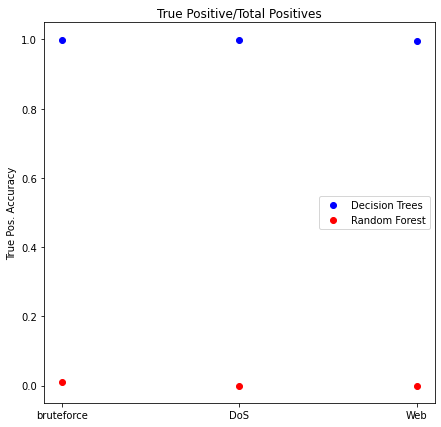

In [105]:
import matplotlib.pyplot as plt
acc_bruteforce=true_positive_bruteforce/(true_positive_bruteforce+false_negative_bruteforce)
acc_dos=true_positive_dos/(true_positive_dos+false_negative_dos)
acc_web=true_positive_web/(true_positive_web+false_negative_web)

rf_acc_bruteforce=rf_true_positive_bruteforce/(rf_true_positive_bruteforce+rf_false_negative_bruteforce)
rf_acc_dos=rf_true_positive_dos/(rf_true_positive_dos+rf_false_negative_dos)
rf_acc_web=rf_true_positive_web/(rf_true_positive_web+rf_false_negative_web)


plt.figure(figsize=(7,7))
plt.plot(['bruteforce','DoS','Web'],[acc_bruteforce,acc_dos,acc_web],'bo')
plt.plot(['bruteforce','DoS','Web'],[rf_acc_bruteforce,rf_acc_dos,rf_acc_web],'ro')
plt.ylabel('True Pos. Accuracy')
plt.title('True Positive/Total Positives')
plt.legend(['Decision Trees','Random Forest'])
plt.savefig('acc_fig_1.png')

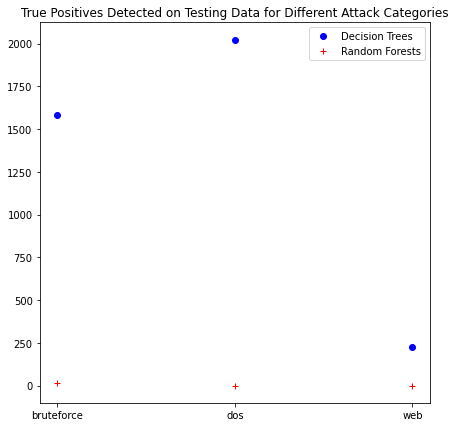

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(['bruteforce','dos','web'],[true_positive_bruteforce,true_positive_dos,true_positive_web],'bo')
plt.plot(['bruteforce','dos','web'],[rf_true_positive_bruteforce,rf_true_positive_dos,rf_true_positive_web],'r+')
plt.legend(['Decision Trees','Random Forests'])
plt.title('True Positives Detected on Testing Data for Different Attack Categories')
plt.savefig('performance2.png')


# END POINTS FOR TESTING YOUR DATA

In [98]:
##  Use these to test a connection...reshape ur data using reshape(-1,1) and pass it throught any of the below functions.
# If it shows a value near one it may be an attacker!!

# tree_classifier_benign.predict(data)

# tree_classifier_bruteforce.predict(data)

# tree_classifier_dos.predict(data)

# tree_classifier_web.predict(data)


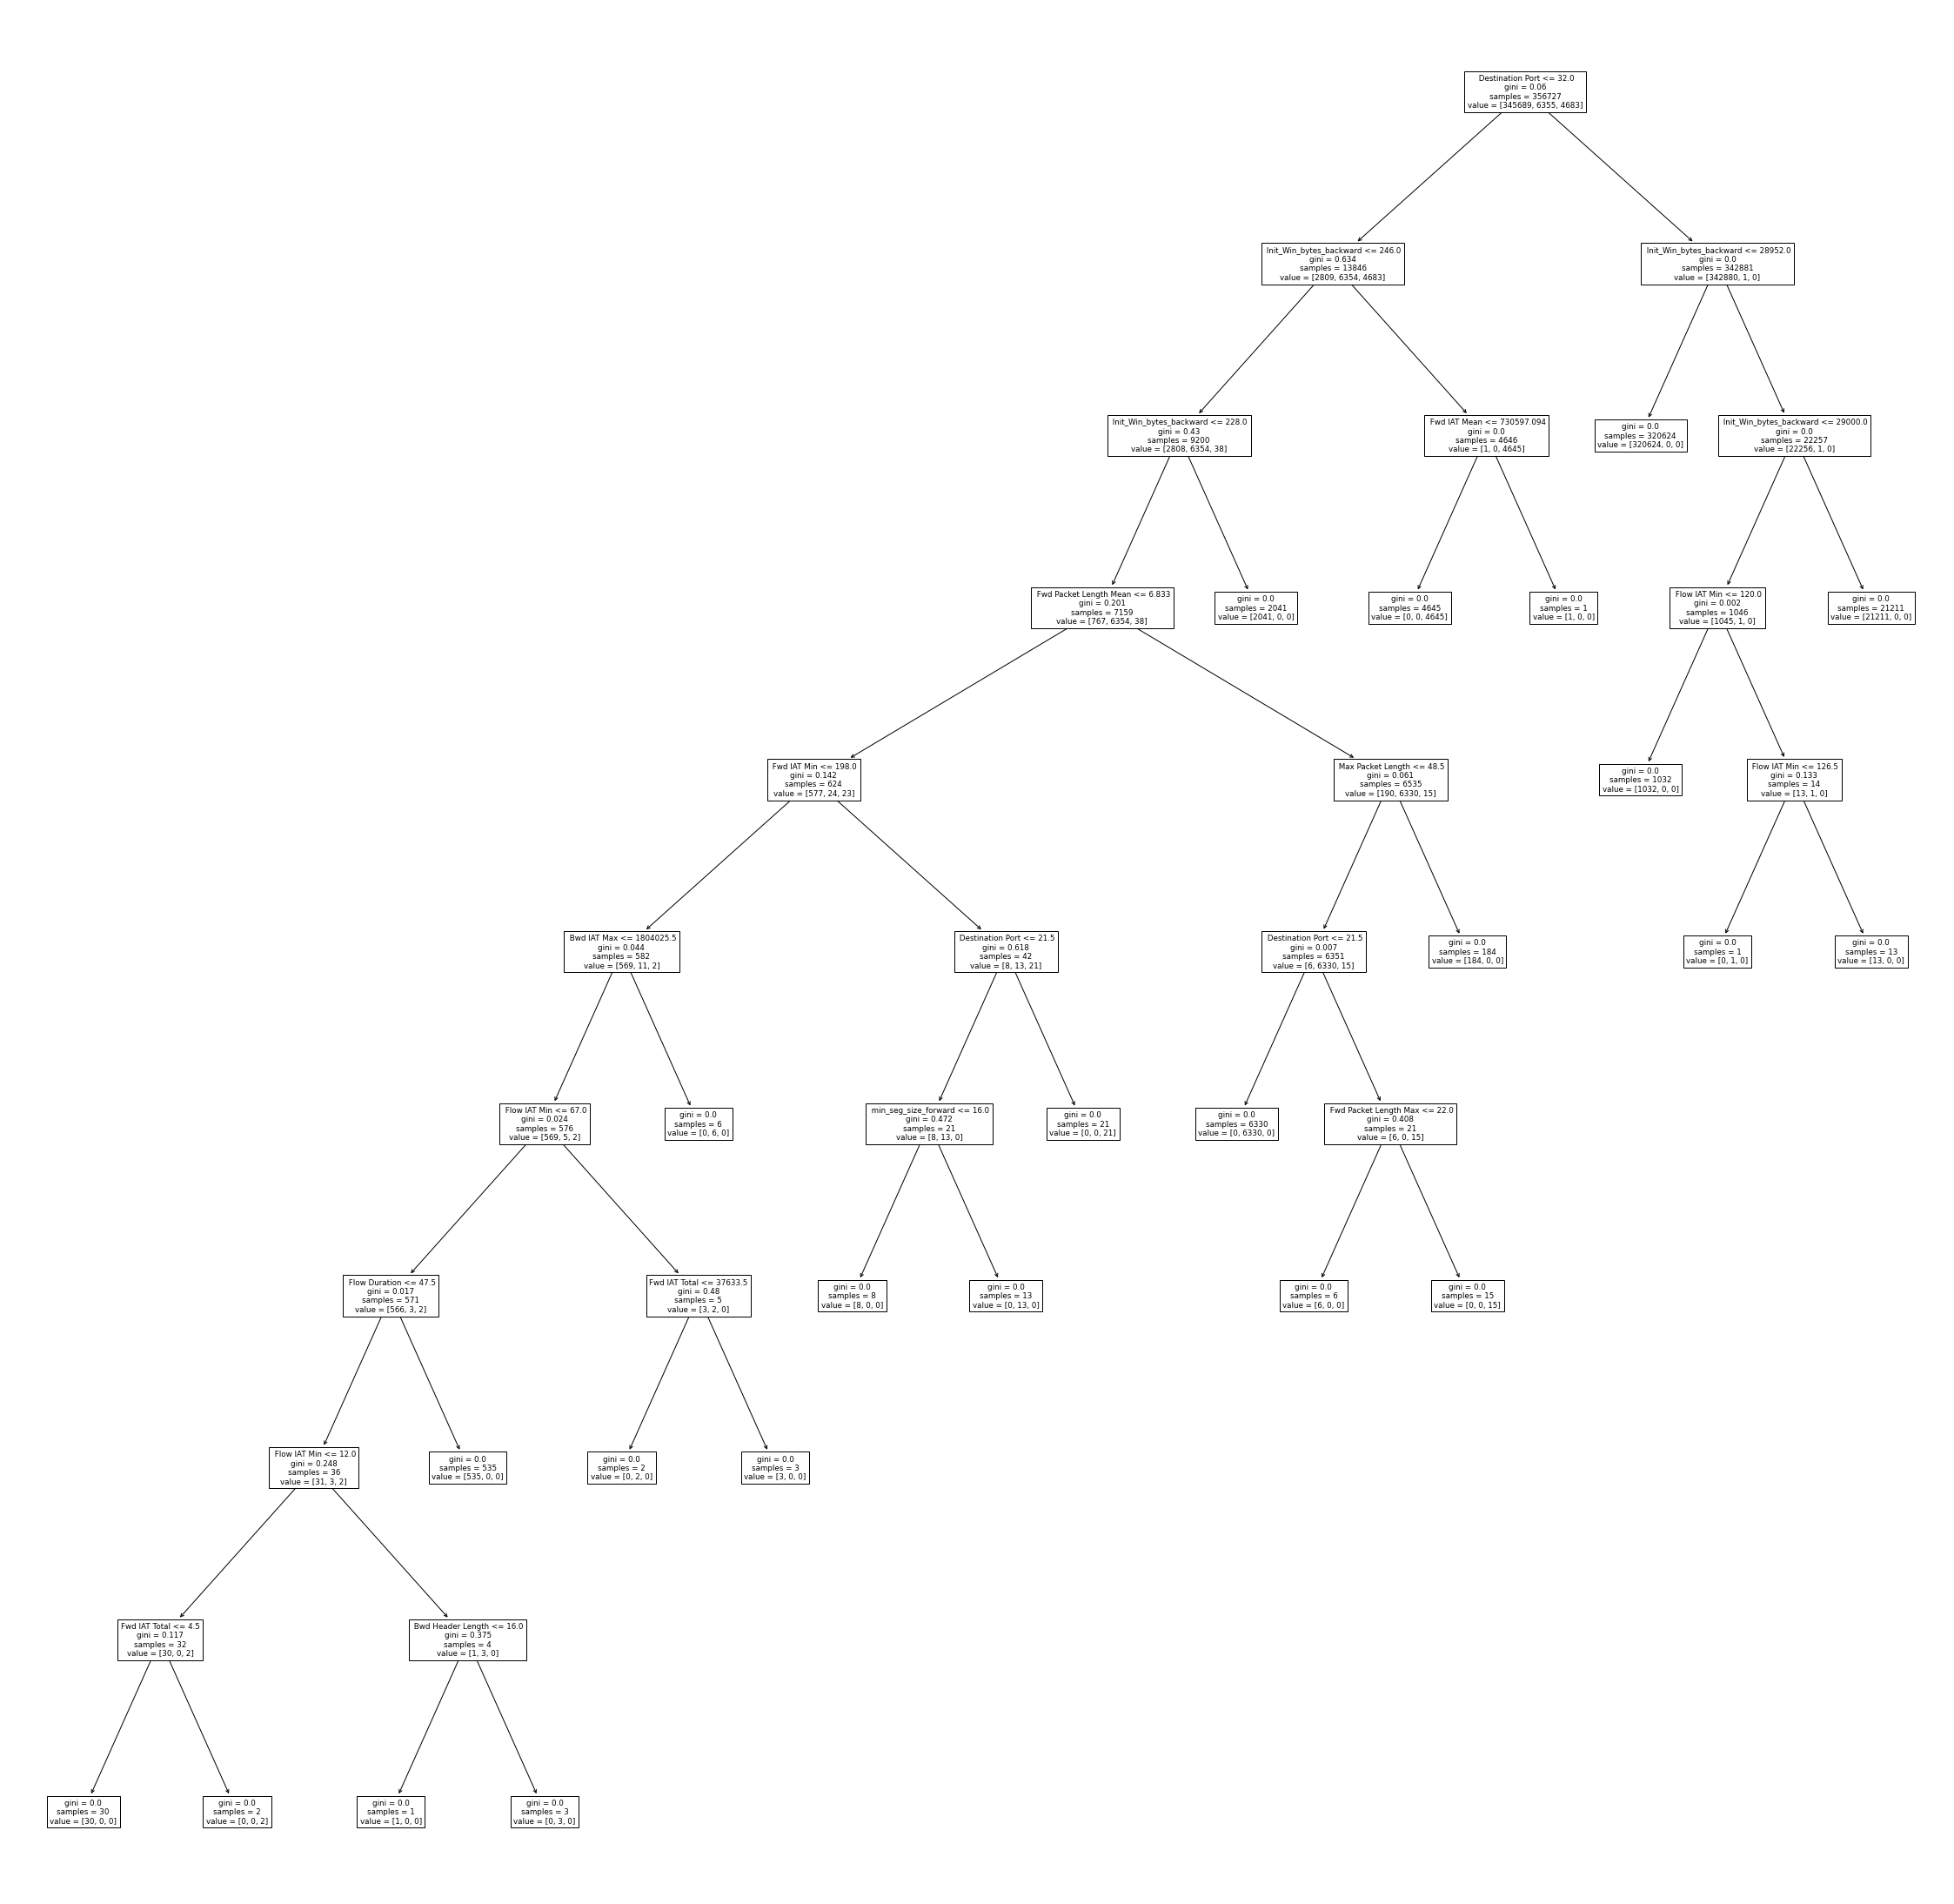

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_bruteforce,feature_names=bruteforce.columns[:-1],)
plt.savefig('bruteforce_tree.png')

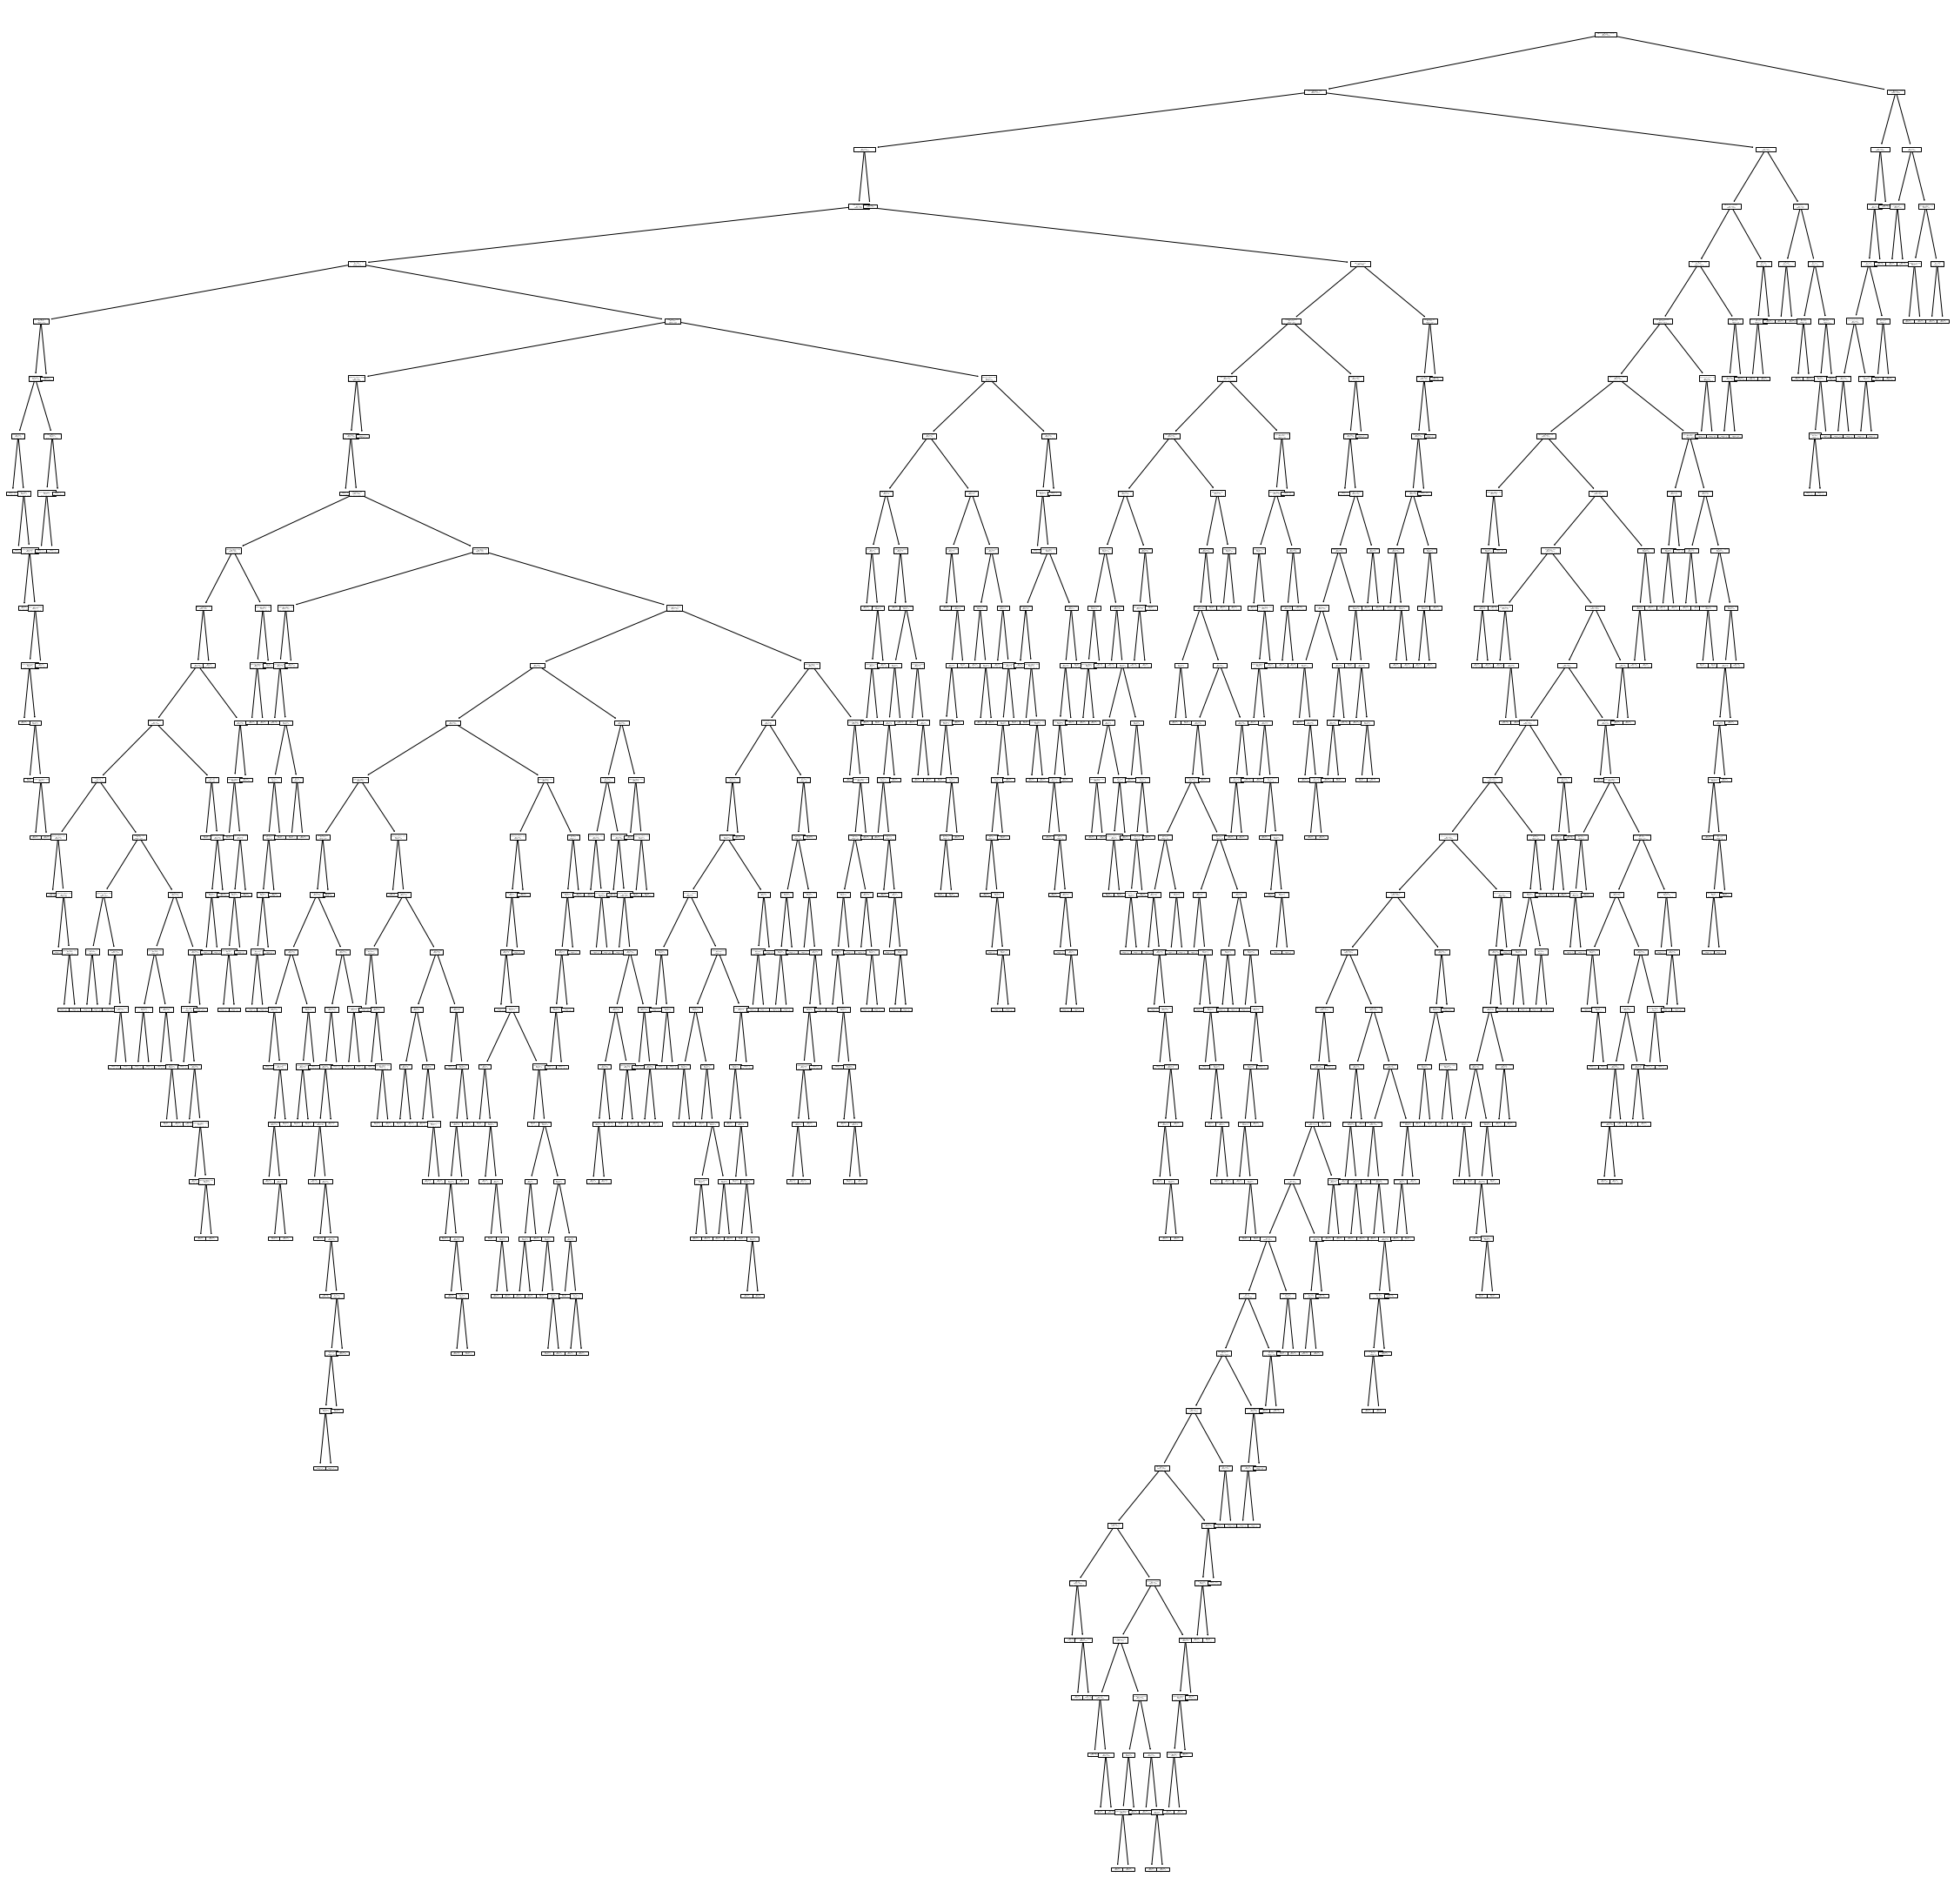

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_dos,feature_names=dos.columns[:-1],)
plt.savefig('dos_tree.png')

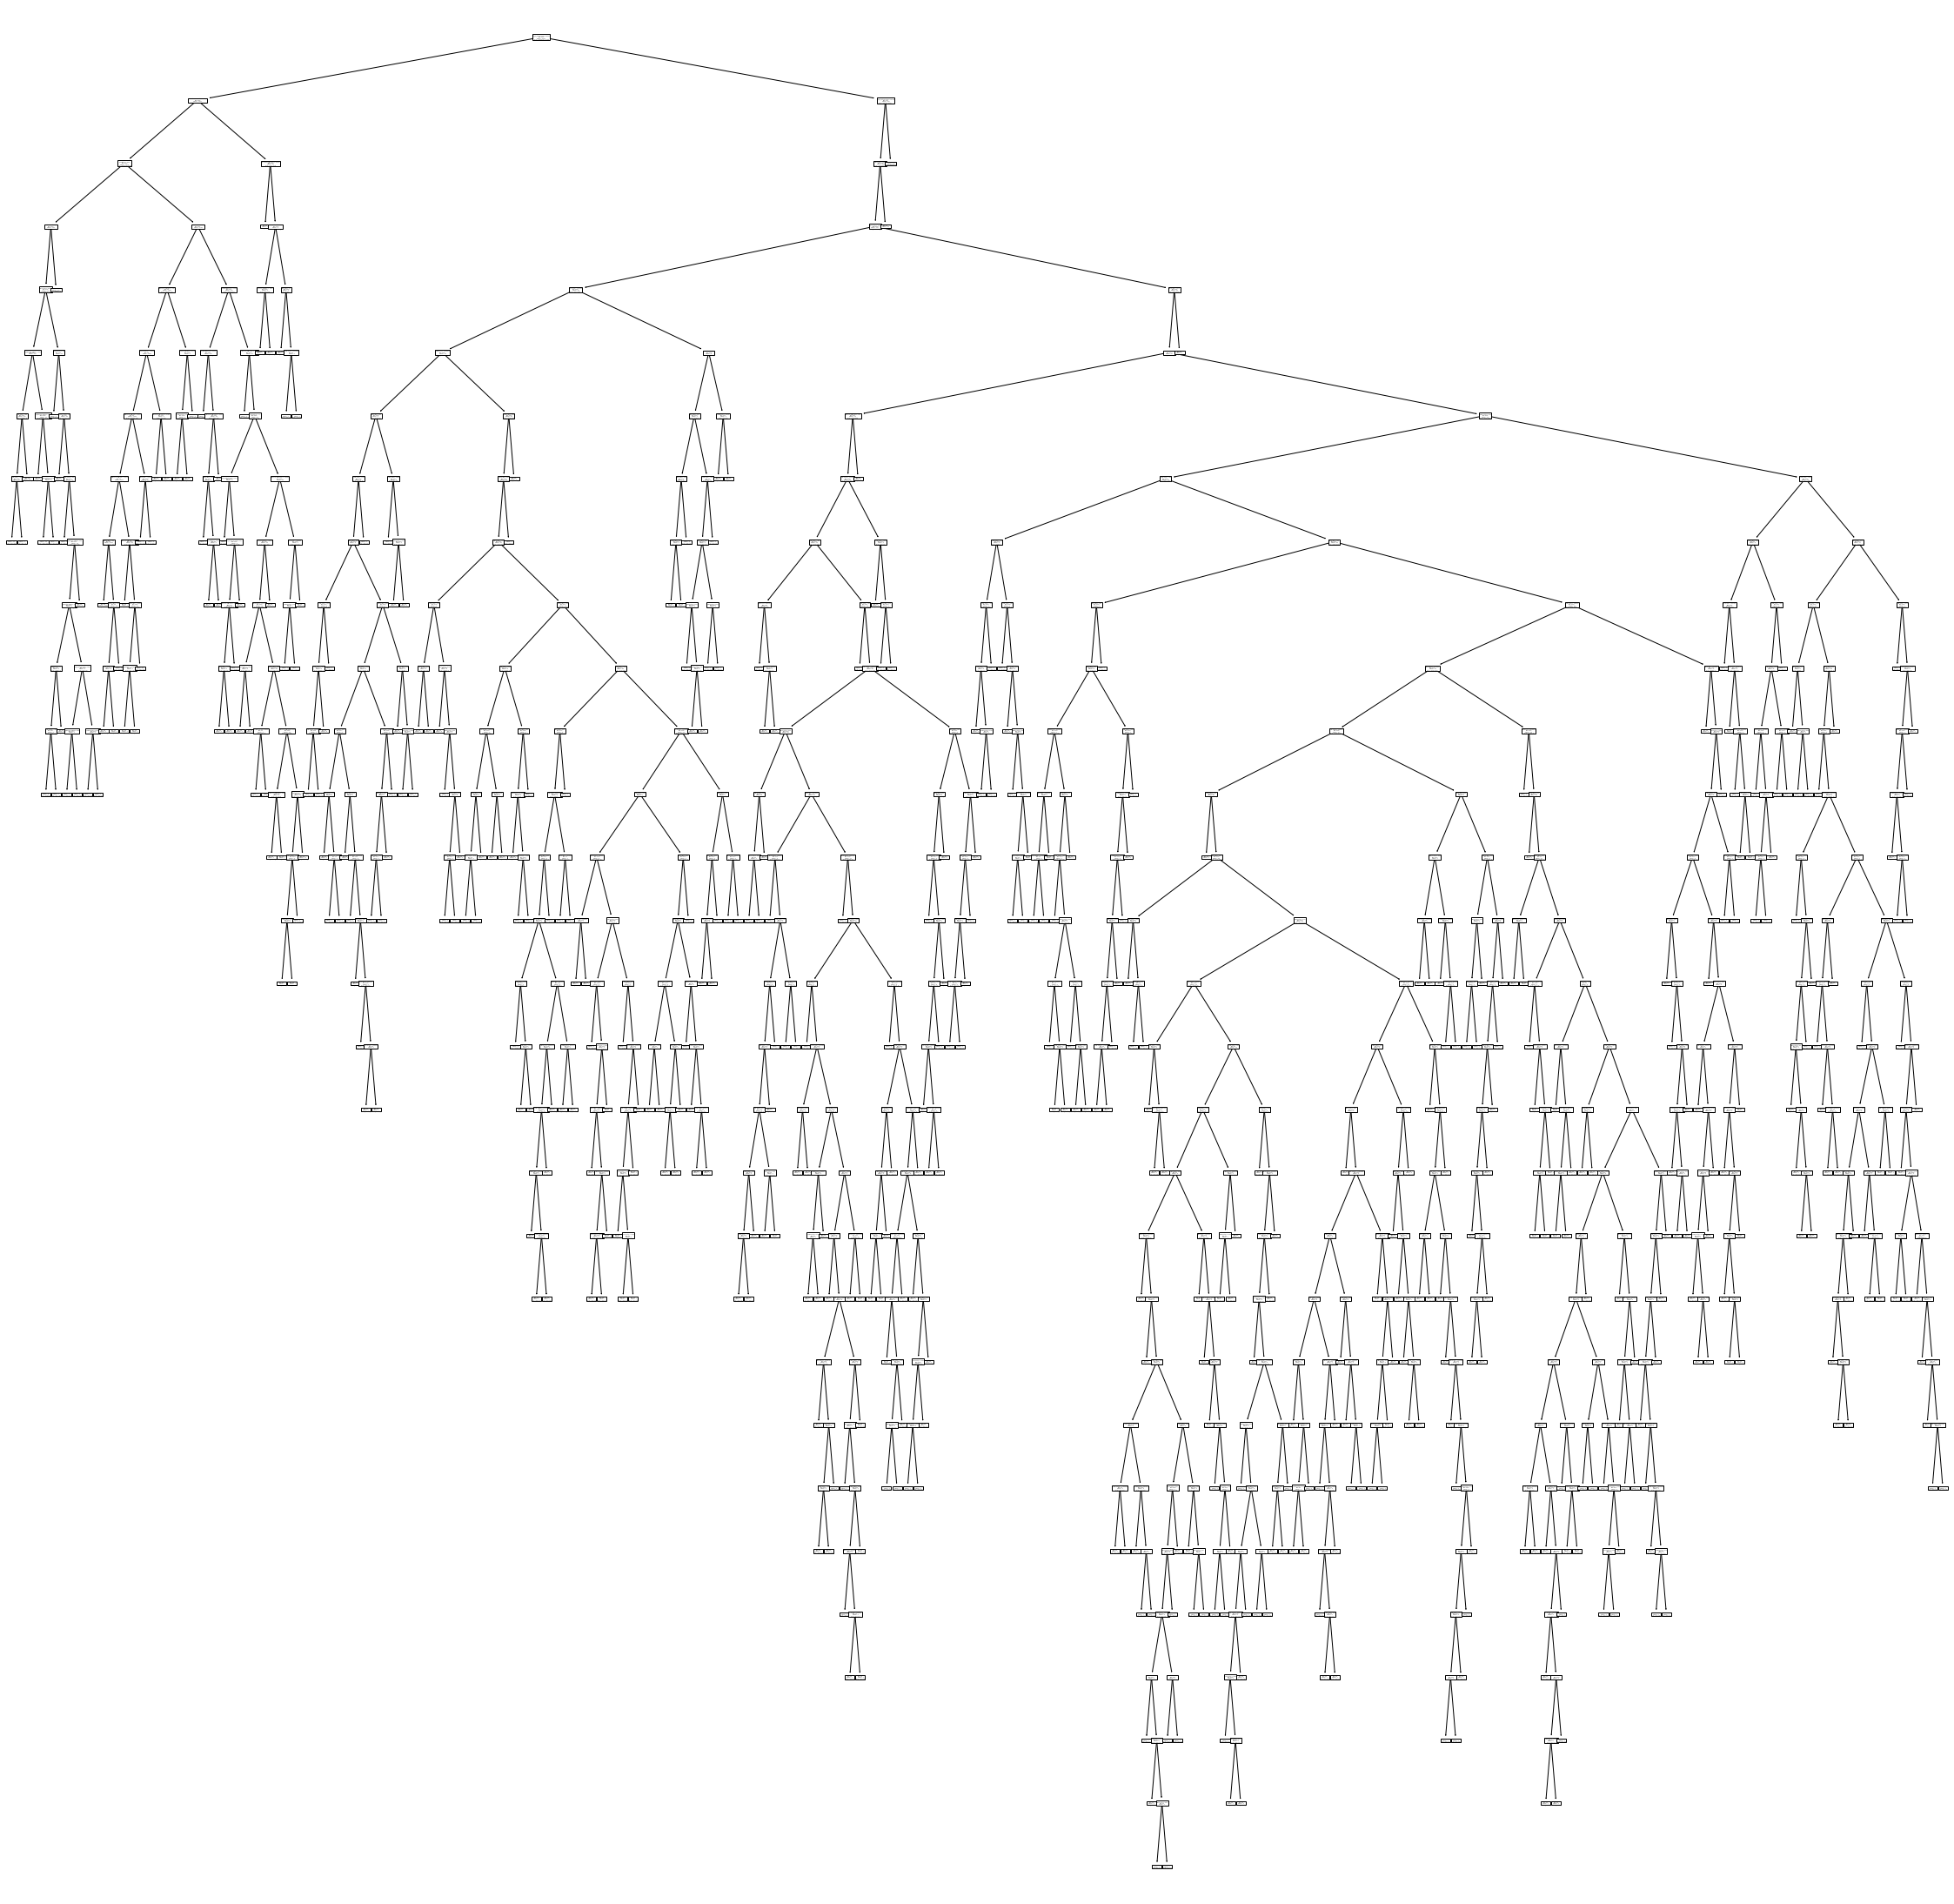

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
tree.plot_tree(tree_classifier_web,feature_names=web.columns[:-1],)
plt.savefig('web_tree.png')